<a href="https://colab.research.google.com/github/LuisAngelFlores31/Probabilidad-y-Estadistica/blob/main/Unidad%201/Practica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UNIDAD 1
##PROBABILIDAD Y ESTADISTICA.
##Practica 6. Estadística descriptiva del Dataset Autos
###Facilitador: Dr. Jose Gabriel Rodrigues Rivas
###Alumno:Luis Angel Flores Salazar

In [62]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statistics import *

In [63]:
autos = pd.read_csv("autos2.csv", encoding = "ISO-8859-1")

In [64]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


##VALROES MAXIMOS Y MINIMOS DE LOS PRECIOS DE LOS AUTOS

In [65]:
autos.price.max()

45400.0

In [66]:
autos.price.min()

5118.0

##MODA, MEDIANA Y MEDIA DE LOS AUTOS

In [67]:
moda = multimode(autos.price)
print(moda)

[16500.0, 5572.0, 7957.0, 6229.0, 6692.0, 7609.0, 8921.0, 7295.0, 8845.0, 8495.0, 9279.0, 13499.0, 18150.0, 7775.0, 7898.0]


In [68]:
mediana = median(autos.price)
print(mediana)

18150.0


In [69]:
Precios = autos['price'].dropna()

media = sum(Precios) / len(autos.price)
print(media)

12949.429268292683


##DESVIACION ESTANDAR DE LOS PRECIOS DE LOS AUTOS

In [70]:
desviacion_estandar_precioa = autos.price.std()
print(desviacion_estandar_precioa)

7947.066341939271


##ESTADISTICOS Y CUARTILES DE LOS PRECIOS DE LOS AUTOS

In [71]:
autos.price.describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


##2.-REALIZAR UN HISTOGRAMA DE PRECIOS DE LOS AUTOMOVILES

In [72]:
import math

In [73]:
df = pd.DataFrame({'Precios': autos.price})
df

,Precios
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [74]:
n = len(autos.price)
k = int( 1 + math.log2(100))
print("Valor de n = ", n , " \nNúmero de intervalos =", k)

Valor de n =  205  
Número de intervalos = 7


In [75]:
tabla_frecuencia = pd.cut( df['Precios'], bins=k, include_lowest=True).value_counts().reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
3,"(33890.857, 39645.429]",7
4,"(28136.286, 33890.857]",6
5,"(22381.714, 28136.286]",5
6,"(39645.429, 45400.0]",3


In [76]:
tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
5,"(22381.714, 28136.286]",5
4,"(28136.286, 33890.857]",6
3,"(33890.857, 39645.429]",7
6,"(39645.429, 45400.0]",3


In [77]:
tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()
tabla_frecuencia['Frec Rel Ac'] = tabla_frecuencia['Frec Rel'].cumsum()
tabla_frecuencia['Frec Porc Ac'] = tabla_frecuencia['Frec Porc'].cumsum()

print(tabla_frecuencia)

                    Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
0   (5077.717, 10872.571]   105  0.512195  51.219512      105     0.512195   
1  (10872.571, 16627.143]    49  0.239024  23.902439      154     0.751220   
2  (16627.143, 22381.714]    26  0.126829  12.682927      180     0.878049   
5  (22381.714, 28136.286]     5  0.024390   2.439024      185     0.902439   
4  (28136.286, 33890.857]     6  0.029268   2.926829      191     0.931707   
3  (33890.857, 39645.429]     7  0.034146   3.414634      198     0.965854   
6    (39645.429, 45400.0]     3  0.014634   1.463415      201     0.980488   

   Frec Porc Ac  
0     51.219512  
1     75.121951  
2     87.804878  
5     90.243902  
4     93.170732  
3     96.585366  
6     98.048780  


Text(0, 0.5, 'Autos')

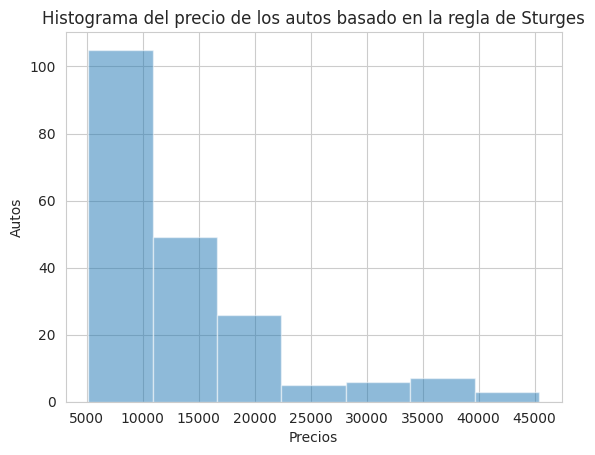

In [78]:
plt.hist(df['Precios'], bins=k, alpha = 0.5)
plt.title('Histograma del precio de los autos basado en la regla de Sturges')
plt.xlabel('Precios')
plt.ylabel('Autos')

#Conclusiones:
Los vehículos más económicos son los que registran mayores ventas, como se puede apreciar claramente en la gráfica.

##3.-DIAGRAMA DE CAJA Y BIGOTES QUE MUESTRE LA RELACIÓN ESTADÍSTICA ENTRE LA COLUMNA DEL PRECIO DEL AUTOMÓVIL (PRICE) Y TIPO DE VEHÍCULO (BODY STYLE).

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
from enum import auto
autos = pd.read_csv("autos2.csv", encoding = "ISO-8859-1")

In [81]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


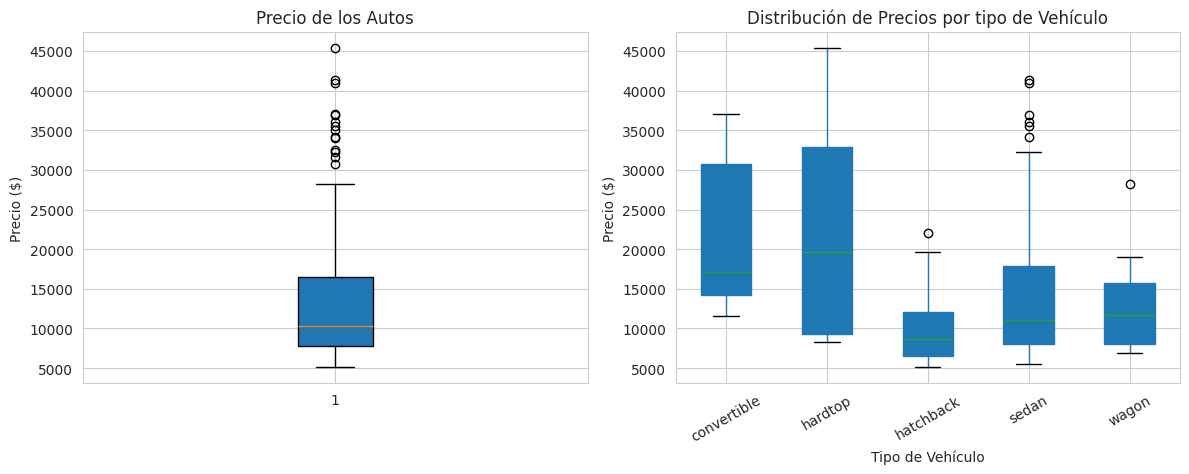

In [82]:
autos["price"] = pd.to_numeric(autos["price"], errors="coerce")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

bplot1 = ax1.boxplot(autos["price"].dropna(), vert=True, patch_artist=True)
ax1.set_title("Precio de los Autos")
ax1.set_ylabel("Precio ($)")

autos.boxplot(column="price", by="body-style", ax=ax2, patch_artist=True)
ax2.set_title("Distribución de Precios por tipo de Vehículo")
ax2.set_xlabel("Tipo de Vehículo")
ax2.set_ylabel("Precio ($)")

fig.suptitle("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#Conclusiones:
El análisis se llevó a cabo utilizando bases de datos reales, lo que puede generar mayores dificultades en la detección de errores, ya sea en el archivo cargado o en alguna variable. En caso de que el bloque de código no se ejecute, simplemente es cuestión de identificar el error y corregirlo.

##4.-DIAGRAMA DE CAJA Y BIGOTES QUE MUESTRE LA RELACIÓN ESTADÍSTICA ENTRE LA COLUMNA DEL PRECIO DEL AUTOMÓVIL (PRICE) Y TIPO TRACCIÓN RUEDAS (DRIVE WHEELS)

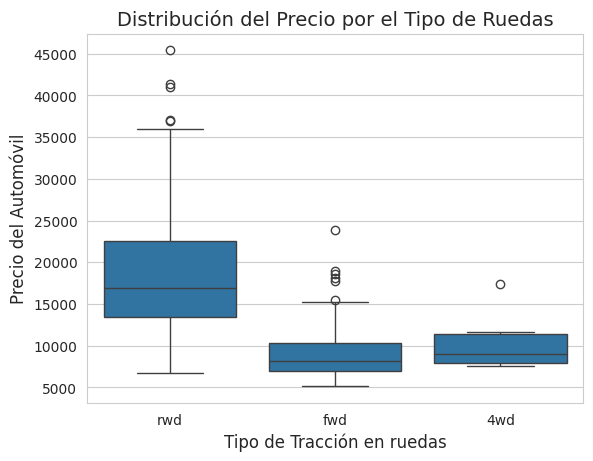

In [83]:
sns.boxplot(x='drive-wheels', y='price', data = autos)
plt.title('Distribución del Precio por el Tipo de Ruedas', fontsize=14)
plt.xlabel('Tipo de Tracción en ruedas', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()

#Conclusiones:
Los autos con tracción RWD son los más caros por su alta mediana y amplio rango de precios. Los FWD son los más económicos, con una mediana baja y precios concentrados. Los 4WD tienen costos intermedios, con una mediana mayor que los FWD y pocos valores atípicos.

## 5.- REALIZAR UN DIAGRAMA DE CAJA Y BIGOTES QUE MUESTRE LA RELACIÓN ESTADÍSTICA ENTRE LA COLUMNA DEL PRECIO DEL AUTOMÓVIL (PRICE) Y LA UBICACIÓN DEL MOTOR (ENGINE-LOCATION)



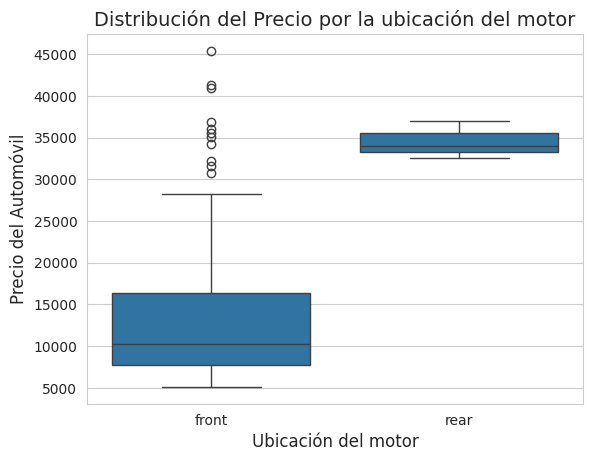

In [84]:
sns.boxplot(x='engine-location', y='price', data = autos)
plt.title('Distribución del Precio por la ubicación del motor', fontsize=14)
plt.xlabel('Ubicación del motor', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()

#Conclusiones:
Se observa que la ubicación frontal es mucho más popular, ya que su precio suele ser bajo, aunque con algunos valores atípicos. En contraste, la ubicación trasera, aunque poco elegida, supera los 30,000 dólares en costo.

#Conclusiones Generales
El análisis mostró que dividir un código complejo facilita la detección de errores y que trabajar con datos reales puede ser un desafío, pero brinda resultados más precisos. En cuanto a los autos, los precios varían según la tracción y el tipo de vehículo. Los convertibles y hardtops son los más costosos, mientras que los hatchbacks son más accesibles. Además, los autos con tracción trasera y en las cuatro ruedas tienen precios más altos, mientras que los de tracción delantera son los más populares por su accesibilidad y practicidad en entornos urbanos.